<a href="https://colab.research.google.com/github/RizkyFitriAndini/PCVK_Ganjil_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum


1. Akses folder images pada Google Drive

In [20]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Melakukan transformasi linier brightness

    Formula: 𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) +  𝑏

    𝑔(𝑥, 𝑦) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness.

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


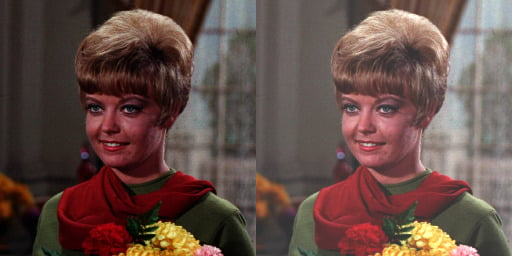

In [21]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
	brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
	print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
	for x in range(original.shape[1]):
		for c in range(original.shape[2]):
			brightness_image[y,x,c] = 255 + np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas Praktikum



1.   Inverse Citra



 Implementasi inverse citra 
----------------------------------


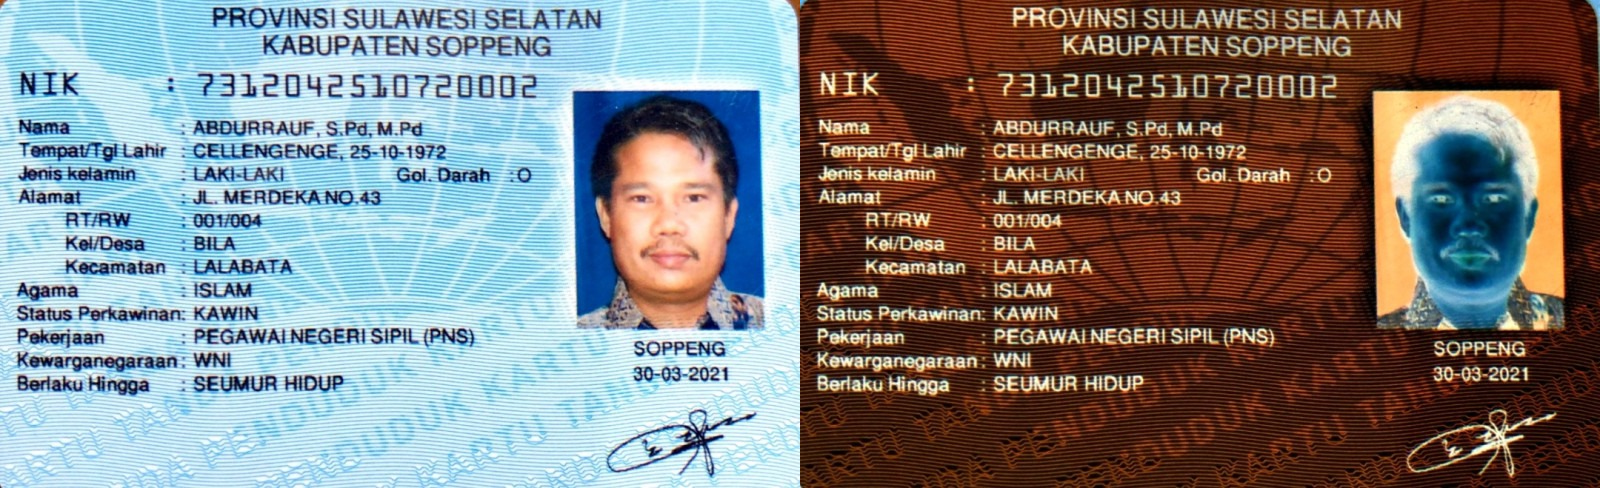

In [36]:
print(' Implementasi inverse citra ')
print('----------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')

#inverse image
inverse_image = 255 - original

final_frame = cv.hconcat([original, inverse_image])
cv2_imshow(final_frame)


2.   Transform contrast



Mengubah tingkat kecerahan dan kontras citra dengan formula faktor kontras
------------------------------------------------------------------------
Masukkan nilai kecerahan antara -255 hingga 255: 50
Masukkan nilai kontras antara -1.0 hingga 3.0: 2


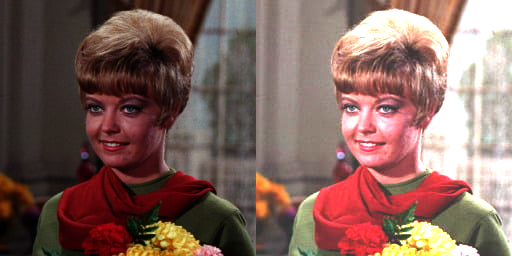

In [33]:
print('Mengubah tingkat kecerahan dan kontras citra dengan formula faktor kontras')
print('------------------------------------------------------------------------')

# Input untuk kecerahan dan kontras
try:
  brightness = int(input('Masukkan nilai kecerahan antara -255 hingga 255: '))
  contrast = int(input('Masukkan nilai kontras antara -1.0 hingga 3.0: '))
except ValueError:
  print('Error: Nilai yang dimasukkan harus berupa angka.')


# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
	for x in range(original.shape[1]):
		for c in range(original.shape[2]):
			brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)

# Menggabungkan citra asli dan hasil untuk perbandingan
final_frame = cv.hconcat([original, brightness_image])

# Menampilkan hasil
cv2_imshow(final_frame)

3. Transformasi logarithmic brightness



Mengubah tingkat kecerahan citra dengan Transformasi log
------------------------------------------------------------------------
Masukkan nilai kecerahan: 50


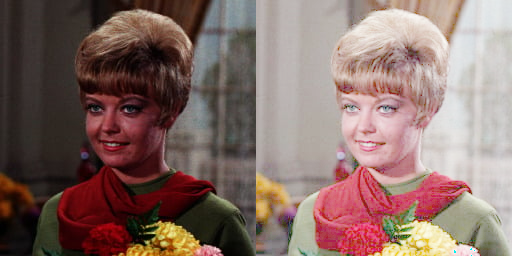

In [54]:
print('Mengubah tingkat kecerahan citra dengan Transformasi log')
print('------------------------------------------------------------------------')

# Input untuk kecerahan dan kontras
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error: Nilai yang dimasukkan harus berupa angka.')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

c = 255 / np.log(1 + np.max(original))
log_image = c * (np.log1p(original + 1))
log_image = np.clip(log_image, 0, 255).astype(np.uint8)

final_frame = cv.hconcat([original, log_image])

cv2_imshow(final_frame)


4. Transformasi grayscale

- Averaging

Implementasikan transformasi grayscale dengan averaging
--------------------------------------------------------


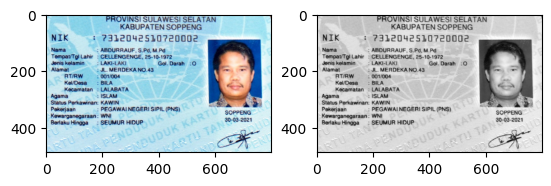

In [84]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan averaging')
print('--------------------------------------------------------')

# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
new_img = np.mean(original, axis=2).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))

plt.show()

- Lightness

Implementasikan transformasi grayscale dengan lightness
--------------------------------------------------------


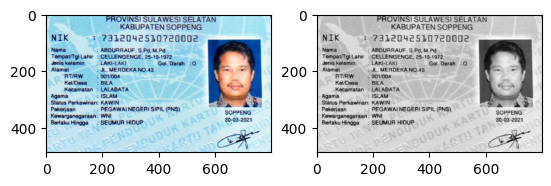

In [110]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan lightness')
print('--------------------------------------------------------')

# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')

B, G, R = cv.split(original)
max_image = np.maximum(np.maximum(R, G), B)
min_image = np.minimum(np.minimum(R, G), B)
combined = np.array([max_image, min_image])
gray_averaging = np.mean(combined, axis=0).astype(np.uint8)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gray_averaging, cv.COLOR_BGR2RGB))

plt.show()

- Luminance

Implementasikan transformasi grayscale dengan lightness
--------------------------------------------------------


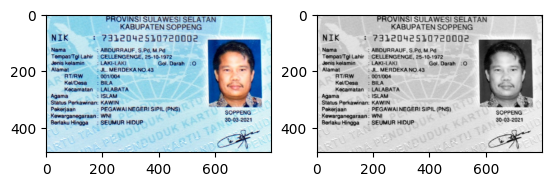

In [109]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan lightness')
print('--------------------------------------------------------')

# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
B, G, R = cv.split(original)
luminance = (0.21 * R + 0.72 * G + 0.07 * B).astype(np.uint8)
luminance_image = np.stack([luminance] * 3, axis=-1)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(luminance_image, cv.COLOR_BGR2RGB))

plt.show()

5. Menampilkan warna tertentu pada citra



Implementasikan transformasi grayscale dengan lightness
--------------------------------------------------------


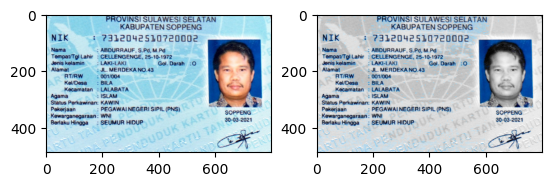

In [92]:
import matplotlib.pyplot as plt
print('Implementasikan transformasi grayscale dengan lightness')
print('--------------------------------------------------------')

# Load citra
original = cv.imread('/content/drive/MyDrive/PCVK/images/ktp.jpg')
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_colored = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Define the color range for blue (HSV color space)
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Convert the original image to HSV
hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

# Create a mask for the blue color
mask = cv.inRange(hsv, lower_blue, upper_blue)

# Convert mask to 3-channel image
mask_colored = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# Combine the blue areas from the original image with the grayscale background
result = np.where(mask_colored == 0, gray_colored, original)

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

plt.show()